<a href="https://colab.research.google.com/github/Akshatpattiwar512/Principal-Component-Analysis/blob/main/Kannada_MNIST_Logistic%2C_DT%2C_PCA%2C_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c Kannada-MNIST

 93% 9.00M/9.71M [00:00<00:00, 63.6MB/s]
100% 9.71M/9.71M [00:00<00:00, 62.1MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 60.8MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 196MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 121MB/s]


In [8]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [9]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [10]:
! unzip Dig-MNIST.csv.zip

Archive:  Dig-MNIST.csv.zip
  inflating: Dig-MNIST.csv           


## Importing Libraries

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
import os

In [18]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
val= pd.read_csv('/content/Dig-MNIST.csv')

In [19]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
test.rename(columns={'id':'label'}, inplace=True)
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
print('Train Shape: ', train.shape)
print('Test Shape:',test.shape)
print('Submission Shape: ',submission.shape)
print('Validation Shape: ',val.shape)

Train Shape:  (60000, 785)
Test Shape: (5000, 785)
Submission Shape:  (5000, 2)
Validation Shape:  (10240, 785)


In [23]:
train.groupby(by='label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

## Prepare Train and Test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size=0.2)

In [25]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,106,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Visualization

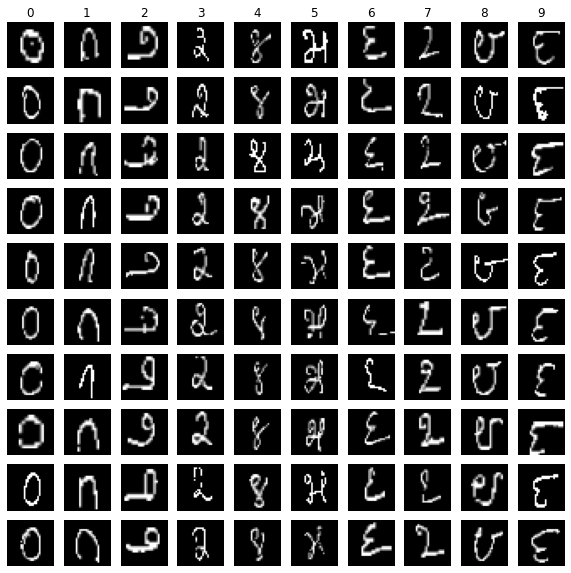

In [27]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))
for i in range(10):
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10):
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

## Machine Learning Algorithm

### Logistic Regression

In [28]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
ModelLR = LogisticRegression(C=5, solver='lbfgs', multi_class='multinomial')
ModelLR.fit(X_train, y_train)

y_predLR = ModelLR.predict(X_test)

# Accuracy score
print('accuracy is',accuracy_score(y_predLR,y_test))

score = accuracy_score(y_predLR,y_test)

accuracy is 0.9615


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
cm = confusion_matrix(y_test, y_predLR)
print(cm)

[[1143   22    7    8    1    1    0    2    5    1]
 [  14 1165    1    3    0    3    0    0    2    2]
 [   8    1 1168    2    0    4    0    0    0    0]
 [   6    0    5 1065   10   11    9   34    1    3]
 [   0    0    1    4 1137   15    2    2    4    7]
 [   1    3    0   12   10 1173    2    0    1    1]
 [   0    0    0    5    0    1 1135   50    0    6]
 [   7    0    1   24    1    1   58 1118    0    8]
 [  10    4    1    0    3    6    1    0 1211   10]
 [   2    1    0    0   11    1    7    8    4 1223]]


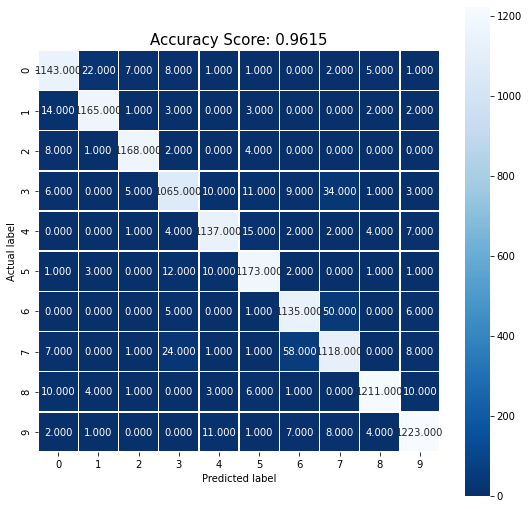

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Decision Tree

In [39]:
# Seed for reproducability
seed = 1234
np.random.seed(seed)

In [40]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
DT = DecisionTreeClassifier(max_depth=10, random_state=seed)
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [41]:
y_predDT = DT.predict(X_test)
print('accuracy DT',accuracy_score(y_predDT,y_test))
scoreDT= accuracy_score(y_predDT,y_test)

accuracy DT 0.8541666666666666


In [42]:
DTm =confusion_matrix(y_test, y_predDT)
print(DTm)

[[1083   30    7   18    1   13    2   10   11   15]
 [   9 1113    1    4    4   53    2    2    0    2]
 [  35    0 1072   22    3   32    9    9    1    0]
 [  28    3    6  961   22   49   18   44   12    1]
 [   5    1    5   92  940   81    5   20   10   13]
 [   0    8   11   85   28 1022    4    7   26   12]
 [  24    1    1   40    0   42 1011   70    6    2]
 [  34    1    4  138   12   22   90  904   10    3]
 [  13    1    1   23    7   63    2    5 1109   22]
 [  27    6    0   83   26   22   11   12   35 1035]]


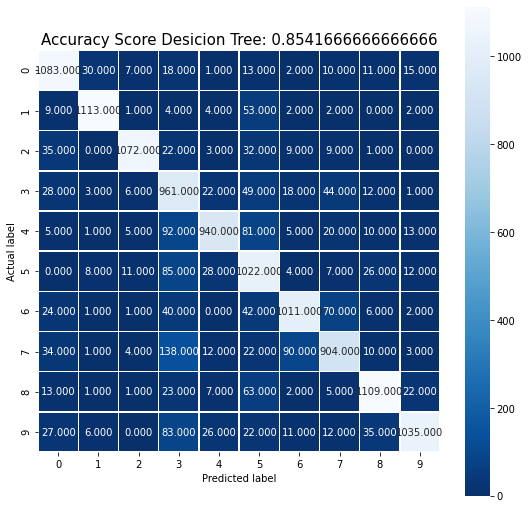

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(DTm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Desicion Tree: {0}'.format(scoreDT)
plt.title(all_sample_title, size = 15);

### PCA svm

In [44]:
from sklearn import svm
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=0.7,whiten=True)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [46]:
sv = svm.SVC(kernel='rbf',C=9)
sv.fit(X_train_PCA , y_train)

SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_predsv = sv.predict(X_test_PCA)

In [48]:
print('accuracy is',accuracy_score(y_predsv,y_test))
scoreclf= accuracy_score(y_predsv,y_test)

accuracy is 0.9895833333333334


### XGBOOST

In [49]:
from xgboost import XGBClassifier
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-merror:0.237667
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.2005
[2]	validation_0-merror:0.177417
[3]	validation_0-merror:0.164083
[4]	validation_0-merror:0.157
[5]	validation_0-merror:0.150583
[6]	validation_0-merror:0.143583
[7]	validation_0-merror:0.13975
[8]	validation_0-merror:0.132667
[9]	validation_0-merror:0.128667
[10]	validation_0-merror:0.12475
[11]	validation_0-merror:0.11975
[12]	validation_0-merror:0.115917
[13]	validation_0-merror:0.113583
[14]	validation_0-merror:0.112333
[15]	validation_0-merror:0.1095
[16]	validation_0-merror:0.106417
[17]	validation_0-merror:0.103417
[18]	validation_0-merror:0.100917
[19]	validation_0-merror:0.09825
[20]	validation_0-merror:0.096
[21]	validation_0-merror:0.094
[22]	validation_0-merror:0.09275
[23]	validation_0-merror:0.09075
[24]	validation_0-merror:0.088583
[25]	validation_0-merror:0.086417
[26]	validation_0-merror:0.0845
[27]	validation_0-merror:0.0835
[28]	validation

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy XGBOOST: 96.00%


### AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)
y_predAda=Model.predict(X_test)
print(classification_report(y_test,y_predAda))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_predAda,y_test))
AdaB = accuracy_score(y_predAda,y_test)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1190
           1       0.84      0.75      0.80      1190
           2       0.71      0.91      0.80      1183
           3       0.73      0.67      0.70      1144
           4       0.75      0.80      0.77      1172
           5       0.79      0.77      0.78      1203
           6       0.64      0.78      0.70      1197
           7       0.60      0.44      0.51      1218
           8       0.87      0.75      0.81      1246
           9       0.80      0.83      0.81      1257

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.75     12000
weighted avg       0.76      0.76      0.75     12000

[[1136   10   11   18    1    0    3    6   13    1]
 [  38 1176    0    0    0    2    0    1    1    1]
 [   1    0 1164    0    0    1    1    0    0    0]
 [  10    1    5 1076    6   11    5   29    0    0]
 [   1    1    0   10 1140   

## SCORES

In [52]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','Decision Tree', 'PCA', 'XGBOOST', "AdaBoost classifier"
              ],
    'Score': [score,scoreDT,scoreclf,accuracy,AdaB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,PCA,0.989583
0,LogisticRegression,0.961500
3,XGBOOST,0.960000
1,Decision Tree,0.854167
4,AdaBoost classifier,0.755250


Text(0, 0.5, 'Algorithm')

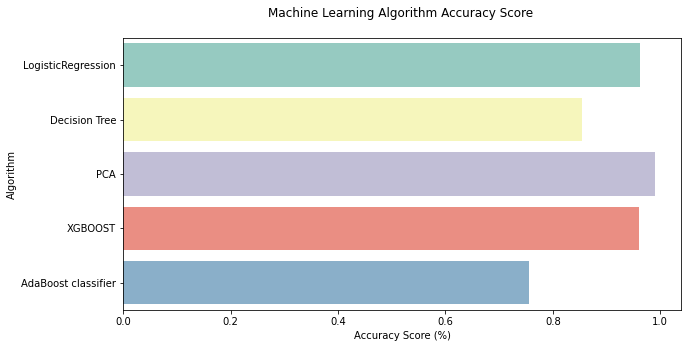

In [53]:
plt.subplots(figsize =(10, 5))
sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')